# E2: Jobot Meets the World - How to Build an AI

![](https://i.imgur.com/MQ7cqXS.png)

In the second episode of "How to Build an AI", we take crucial steps to prepare [Jobot](https://jobot.dev), the AI we [previously created](https://jovian.com/learn/how-to-build-an-ai/lesson/episode-1-first-contact-with-jobot), for its real-world debut. After thorough internal testing, we're ready to introduce Jobot to users and ensure a seamless and secure experience.

The following topics are covered in this tutorial:

- Setting up a cloud database using Supabase for storing user data


- Letting users create an account to chat with Jobot without an API key


- Setting up an API endpoint that connects securely to OpenAI APIs


- Configuring environment variables for secure production deployment

The best way to learn these skills is to follow along step-by-step and type out all the code yourself.

## Problem Statement

<img src="https://i.imgur.com/GWzcTOe.png" width="640">

> **PROBLEM**: Make the following enhancements to the chatbot UI developed in the previous tutorial:
>
> 1. Replace the "Enter API key" input in the navbar with a "Sign In" buttons that opens a login dialog.
>
> 2. Allow the user to sign in with their email (using a one-time login code sent)
>
> 3. Once signed in, allow the user to chat with Jobot without requiring their OpenAI API key
>
> 4. Implement some rate limits to ensure that users can't send too many messages too quickly


### Prerequisites

The tutorial builds on the [previous tutorial](https://jovian.com/learn/how-to-build-an-ai/lesson/episode-1-first-contact-with-jobot) assumes basic knowledge of the following:


- HTML, CSS, and JavaScript


- Git, GitHub, and VS Code


- ReactJS, NextJS, and Tailwind CSS

Links to beginner-friendly resources for learning these skills are included at the end. Try to learn just enough so that you can understand and build on top of the code in this tutorial, and use ChatGPT (or Jobot) for help.

Here's the site we built in the previous tutorial:

<img src="https://i.imgur.com/bNunZda.png" width="360">

### Code & Finished Site

The code for this tutorial can be found here:


- Finished code: https://github.com/JovianHQ/jobot/tree/user-login


- Finished site: https://jobot-dev-git-user-login-jovian.vercel.app/


- Starter code: https://github.com/JovianHQ/jobot/tree/e1-first-contact-with-jobot


- Starter site: https://jobot-50denx539-jovian.vercel.app/

### Starting a  GitHub Codespace

<img src="https://i.imgur.com/hjleBqj.png" width="420">

We'll use GitHub codespaces for development. Here are the steps to open up a repository in Codespaces and launch it within VS Code:


1. Navigate to the GitHub repository that you want to work on.


2. Click on the "Code" button, and select "Open with Codespaces" from the dropdown menu.


3. Select the Codespace configuration that you want to use, or create a new one if necessary.


4. Wait for the Codespace to be created, which may take a few minutes, if done for the first time.


5. Once the Codespace is ready, click on the "Open in Visual Studio Code" button

You can either work with the browser-based version of VS Code, or you can connect remotely to the codespace using your installation of VS Code.

Learn more about using VS Code with Codespaces here: https://code.visualstudio.com/docs/remote/codespaces

**NOTE**: GitHub provides 120 hours of free codespaces usage for personal accounts. Learn more about the [pricing here](https://docs.github.com/en/billing/managing-billing-for-github-codespaces/about-billing-for-github-codespaces).

### Creating a Development Branch


To ensure that we can test our changes before deploying them to production, we can create a development branch:

<font color="red">步驟 0：建立`branch` (當下使用 Codespace 的 VS Code)</font>

```PowerShell
/workspaces/jobot/jobot-web (main) $ git checkout -b user-login-flow
```
> <font color="red">Lecture 使用</font>
> ```PowerShell
> /workspaces/jobot/jobot-web (main) $ git checkout -b user-login
> ```

Later we'll create a pull request with this branch, preview the changes, and then merge it to the `main` branch

## Supabase Project Setup




<img src="https://i.imgur.com/cWZRABN.png" width="420">

[Supabase](https://supabase.com) is an open-source platform that allows developers to easily build scalable, real-time applications with a PostgreSQL, user authentication, and more.




1. **Sign up for a Supabase account**: Visit https://supabase.com and sign up for an account by clicking on the "Sign In" / "Get Started" button. You can sign up using your email or Github account.

<font color="red">步驟 1：建立帳號</font>

2. **Create a new project**: Once you've signed up, click on the "Create a new project" button and give your project a name. You'll also need to select a region where your data will be stored.


<font color="red">步驟 2：建立專案</font>

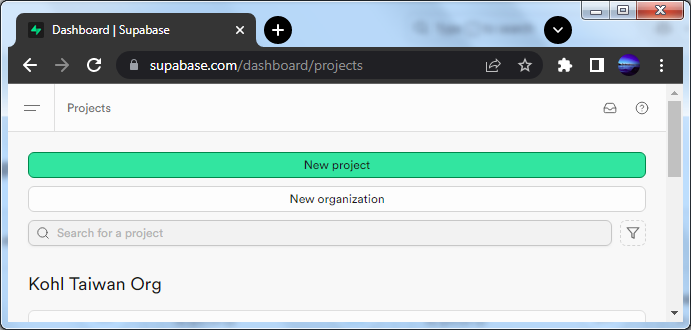

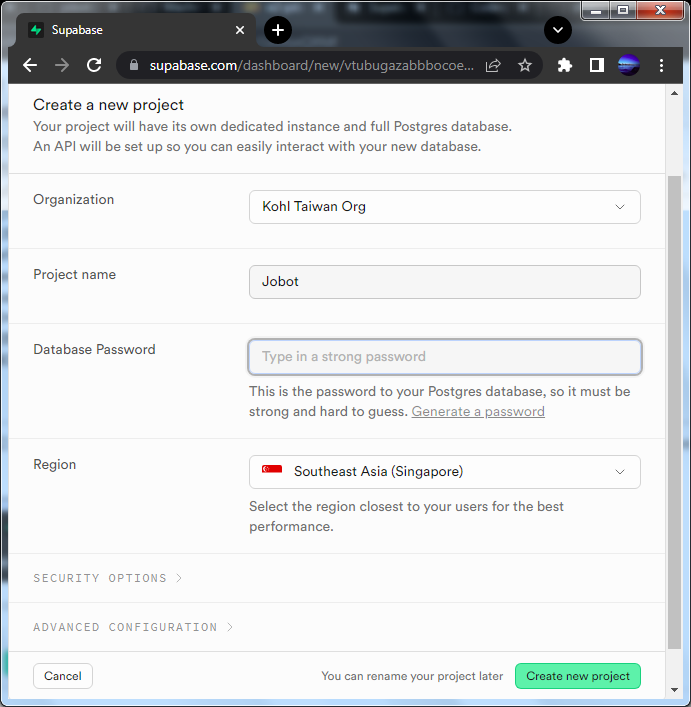

3. **Configure "Confirm Your Signup" and  "Magic Link" Email**: Open the "Authentication" tab, select "Emails" and edit the "Magic Link" email template

  Subject: `Verification Code - Jobot`
  
  Body:

```html
<h2>Verification Code - Jobot</h2>

<p>Enter this code to login: <b>{{ .Token }}</b></p>


```


Similarly, also change the "Confirm Your Signup" email:

```html
<h2>Confirm your signup</h2>

<p>Enter this code to confirm your signup:</p>
<p>{{ .Token }}</p>
```

<font color="red">步驟 7 後：在 **Authentication** 中的 **Email template** 去設定</font>

<font color="red">**Confirm signup**</font>

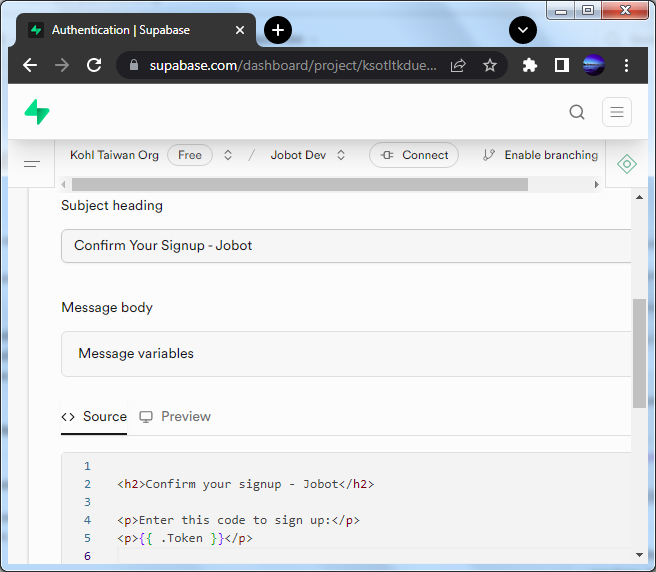

<font color="red">**Magic Link**</font>

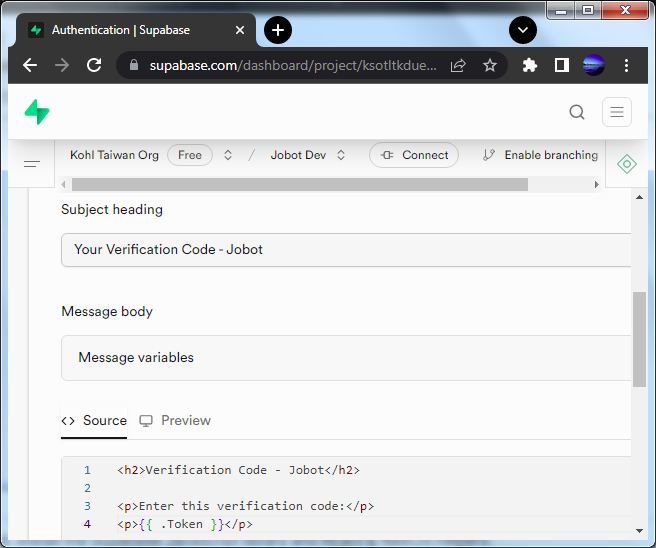

4. Install the Supabase Javascript library and REact & NextJS helpers:

<font color="red">步驟 3：安裝 (在目錄 jobot-web 下)</font>

```
/workspaces/jobot/jobot-web (user-login) $ npm install @supabase/supabase-js @supabase/auth-helpers-nextjs @supabase/auth-helpers-react
```

<font color="red">注意，以上安裝方式，將會安裝最新版的 packages，但 新版`auth-helpers-nextjs` 有些模塊已經 deprecated（註：參考 1）</font>
> <font color="red">`_app.js` 中 `createBrowserSupabaseClient` 模塊被 deprecated (產生警告提示)</font>
>
> <font color="red">`chat.js` 中 `createMiddlewareSupabaseClient` 模塊被 deprecated (產生禁止提示) -- **Supabase** 完全無法運行</font>
>
> <font color="red">解決方式(安裝早期版本)</font>
> ```
> /workspaces/jobot/jobot-web (user-login) $ npm install @supabase/auth-helpers-nextjs@0.6.1
> ```

Learn more here: https://supabase.com/docs/guides/auth/auth-helpers/nextjs

5. Set up environment variables in `.env.local`:

<font color="red">步驟 4：在目錄 jobot-web 下，建立檔案 `.env.local`（前兩個用 NEXT_PUBLIC 為前綴的變數會傳遞到前端使用者的瀏覽器，第三個變數則只會存放於伺服器端）</font>


```ini
NEXT_PUBLIC_SUPABASE_URL=xxx
NEXT_PUBLIC_SUPABASE_ANON_KEY=xxx
OPENAI_API_KEY=xxx
```

Put in the actual values here.

6. Put the following code inside `pages/_app.js`:

<font color="red">步驟 5：在目錄 jobot-web/pages/ 下，修改檔案 `_app.js`</font>

```javascript
import { createBrowserSupabaseClient } from '@supabase/auth-helpers-nextjs'
import { SessionContextProvider } from '@supabase/auth-helpers-react'
import { useState } from 'react'

function MyApp({ Component, pageProps }) {
  // Create a new supabase browser client on every first render.
  const [supabaseClient] = useState(() => createBrowserSupabaseClient())

  return (
    <SessionContextProvider
      supabaseClient={supabaseClient}
      initialSession={pageProps.initialSession}
    >
      <Component {...pageProps} />
    </SessionContextProvider>
  )
}

```

## Refactoring the Navbar
<font color="red">完成(55:00)</font>


Create a file `src/components/Navbar.js` with the following code:

<font color="red">步驟 6：在目錄 jobot-web/components/ 下，修改檔案 `Navbar.js`(注意大小寫，不是`import Link from "next/Link";`)</font>

```javascript
import { useUser } from "@supabase/auth-helpers-react";
import Link from "next/link";

export default function Navbar() {
  const user = useUser();

  return (
    <nav className="shadow px-4 py-2 flex flex-row justify-between items-center">
      <div className="text-xl font-bold">Jobot</div>
      <div>
        {user === null && (
          <Link
            href="/login"
            className="text-gray-500 hover:text-blue-500 text-sm"
          >
            Log In
          </Link>
        )}
        {user && (
          <Link
            href="/logout"
            className="text-gray-500 hover:text-blue-500 text-sm"
          >
            Log Out
          </Link>
        )}
      </div>
    </nav>
  );
}


```

Now you can just use the `<Navbar />` component in `index.js`

<font color="red">步驟 6-1：修改 `index.jx`</font>

## Creating a Login Page

<font color="red">步驟 7補：安裝 (在目錄 jobot-web 下)</font>

```
/workspaces/jobot/jobot-web (user-login) $ npm install react-hot-toast
```

Create a file `src/pages/login.js` with the following code:

<font color="red">步驟 7：在目錄 jobot-web/pages/ 下，建立檔案 `login.js`</font>


<font color="red">參考[Sign in a user through OTP](https://supabase.com/docs/reference/javascript/auth-signinwithotp) 與 [Verify and log in through OTP](https://supabase.com/docs/reference/javascript/auth-verifyotp)</font>

```javascript
import Navbar from "@/components/Navbar";
import { useSupabaseClient } from "@supabase/auth-helpers-react";
import Head from "next/head";
import Link from "next/link";
import { useRouter } from "next/router";
import { useState } from "react";
import toast, { Toaster } from "react-hot-toast";

export default function Login() {
  const supabaseClient = useSupabaseClient();

  const [email, setEmail] = useState("");
  const [code, setCode] = useState("");

  const router = useRouter();

  async function sendCode() {
    const { data, error } = await supabaseClient.auth.signInWithOtp({
      email: email,
    });
    if (data) {
      toast.success("Verification code sent to email");
      console.log("Verification code sent to email", data);
    }
    if (error) {
      toast.error("Failed to send verification code.");
      console.error("Failed to send verification code.", error);
    }
  }

  async function submitCode() {
    const { data, error } = await supabaseClient.auth.verifyOtp({
      email,
      token: code,
      type: "magiclink",
    });
    if (data) {
      toast.success("Logged in");
      console.log("Logged in successfully", data);
      router.push("/");
    }
    if (error) {
      console.error("Login failed", error);

      const { data: d2, error: e2 } = await supabaseClient.auth.verifyOtp({
        email,
        token: code,
        type: "signup",
      });

      if (d2) {
        toast.success("Signed up");
        console.log("Signed up successfully", data);
      } else {
        toast.error("Failed to log in / sign up");
        console.error("Failed to log in / sign up", e2);
      }
    }
  }

  return (
    <>
      <Head>
        <title>Jobot - Your friendly neighborhood AI</title>
      </Head>
      <Toaster />
      <div className="flex flex-col h-screen">
        <Navbar />

        <div className="mx-auto max-w-md">
          <div className="border self-center rounded-lg my-8 p-4 m-4">
            <div className="text-center text-xl font-bold text-gray-800">
              Sign In - Jobot
            </div>

            <div className=" flex flex-col my-4">
              <label className="font-medium text-gray-600">Email</label>
              <input
                type="email"
                className="border p-2 rounded-md mt-1"
                placeholder="john@doe.com"
                value={email}
                onChange={(e) => setEmail(e.target.value)}
              />
              <button
                className="w-40 border text-sm font-medium px-4 py-2 mt-2 rounded-md bg-gray-50 hover:bg-gray-100"
                onClick={sendCode}
              >
                Send Code
              </button>
            </div>

            <div className=" flex flex-col my-4">
              <label className="font-medium text-gray-600">
                Verification Code
              </label>
              <input
                type="password"
                className="border p-2 rounded-md mt-1"
                placeholder="123456"
                onChange={(e) => setCode(e.target.value)}
                value={code}
              />
              <button
                onClick={submitCode}
                className="w-40 border border-blue-600 text-sm font-medium px-4 py-2 mt-2 rounded-md bg-blue-500 hover:bg-blue-600 text-white"
              >
                Sign In
              </button>
            </div>

            <p className="text-gray-600 text-sm prose">
              {"By signing in, you agree to our "}
              <Link href="/terms">terms of use</Link>
              {" and "}
              <Link href="/privacy">privacy policy</Link>.
            </p>
          </div>
        </div>
      </div>
    </>
  );
}


```

### Creating a Logout Page
<font color="red">完成(58:00)</font>

Add another file `src/pages/logout.js` with the following code:

<font color="red">步驟 8：在目錄 jobot-web/pages/ 下，建立檔案 `logout.js`</font>

<font color="red">參考[Sign out a user](https://supabase.com/docs/reference/javascript/auth-signout)</font>

```javascript
import { useSupabaseClient } from "@supabase/auth-helpers-react";
import { useRouter } from "next/router";
import { useEffect } from "react";

export default function Logout() {
  const router = useRouter();
  const supabaseClient = useSupabaseClient();
  useEffect(() => {
    supabaseClient.auth.signOut().then(() => {
      router.push("/");
    });
  }, [router, supabaseClient]);

  return <div></div>;
}

```

## OpenAI Streaming Helpers

<font color="red">完成（1:06:10）</font>

Create a file `src/utils/openai.js` with the following content:

<font color="red">步驟 9：在目錄 /jobot-web/ 下，建立資料夾 `utils`，與此之下建立 `openai.js`</font>

```javascript
import { createParser } from "eventsource-parser";

/* Sends a request to the OpenAI API to generate a text completion for
the given body and returns a readable stream of encoded text data */
export const OpenAIStream = async (body) => {
  const encoder = new TextEncoder();
  const decoder = new TextDecoder();

  const res = await fetch("https://api.openai.com/v1/chat/completions", {
    headers: {
      "Content-Type": "application/json",
      Authorization: `Bearer ${process.env.OPENAI_API_KEY}`,
    },
    method: "POST",
    body: JSON.stringify(body),
  });

  if (res.status !== 200) {
    throw new Error("OpenAI API returned an error");
  }

  const stream = new ReadableStream({
    async start(controller) {
      const onParse = (event) => {
        if (event.type === "event") {
          const data = event.data;

          if (data === "[DONE]") {
            controller.close();
            return;
          }

          try {
            const json = JSON.parse(data);
            const text = json.choices[0].delta.content;
            const queue = encoder.encode(text);
            controller.enqueue(queue);
          } catch (e) {
            controller.error(e);
          }
        }
      };

      const parser = createParser(onParse);

      for await (const chunk of res.body) {
        parser.feed(decoder.decode(chunk));
      }
    },
  });

  return stream;
};

export async function streamOpenAIResponse(response, callback) {
  const reader = response.body.getReader();
  const decoder = new TextDecoder();
  let done = false;
  let text = "";
  let isFirst = true;
  while (!done) {
    const { value, done: doneReading } = await reader.read();
    done = doneReading;
    const chunkValue = decoder.decode(value);
    text += chunkValue;
    callback(text, isFirst);
    isFirst = false;
  }
}
```

## Creating an Authenticated API Endpoint
<font color="red">完成（1:09:05）</font>

Create a file `src/pages/api/chat.js` with the following content:

<font color="red">步驟 10：在目錄 `/jobot-web/pages/api` 下，建立檔案 `chat.js`</font>
> <font color="red">（同目錄下`hello.js`可以在瀏覽器輸入 "`專案首頁網址/api/hello`" 查看 `hello.js`內容）</font>

```javascript
import { OpenAIStream } from "@/utils/openai";
import { createMiddlewareSupabaseClient } from "@supabase/auth-helpers-nextjs"; // 讓 Supabase 當成 Client 傳遞 request 給 OpenAI

export const config = { // it's required for streaming. Just search `next JS API route how to stream data--it's going to say: use the edge runtime`
  runtime: "edge",
};

async function handler(req, res) {
  const supabase = createMiddlewareSupabaseClient({ req, res });
  const body = await req.json();

  body.model = "gpt-3.5-turbo"; // 1:18:45 最後加入

  const {
    data: { user },
    error,
  } = await supabase.auth.getUser();

  if (!user || error) {
    return new Response("Unauthorized", { status: 401 });
  }

  const stream = await OpenAIStream(body);

  return new Response(stream, { status: 200 });
}

export default handler;

```

> **EXERCISE**: Learn more about NextJS edge API routes here: https://nextjs.org/docs/api-routes/edge-api-routes

## Using the Authenticated API Endpoint

<font color="red">完成（1:15:45），開始（1:10:16）</font>

Update the `sendRequest` function in `pages/index.js` with the following code:

<font color="red">步驟 11：修改 `index.js`</font>

```javascript
const sendRequest = async () => {
    if (!user) {  // comes from useUser();
      toast.error("Please log in to send a message!");
      return;
    }

    if (!userMessage) {
      alert("Please enter a message before you hit send");
    }

    const oldUserMessage = userMessage;
    const oldMessages = messages;

    const updatedMessages = [
      ...messages,
      {
        role: "user",
        content: userMessage,
      },
    ];

    setMessages(updatedMessages);
    setUserMessage("");

    try {
      const response = await fetch(API_URL, {
        method: "POST",
        headers: {
          "Content-Type": "application/json",
        },
        body: JSON.stringify({
          model: "gpt-3.5-turbo",
          messages: updatedMessages,
          stream: true,
        }),
      });

      if (response.status !== 200) {
        throw new Error(
          `OpenAI API returned an error. Please ensure you've provided the right API key. Check the "Console" or "Network" of your browser's developer tools for details.`
        );
      }

      // pass `response` 成 stream，獲得 byte, byte ... ; event by event
      streamOpenAIResponse(response, (newMessage) => {
        console.log("newMessage:", newMessage); // 測試用，
        const updatedMessages2 = [
          ...updatedMessages,
          { role: "assistant", content: newMessage },
        ];

        setMessages(updatedMessages2);
      });
    } catch (error) {
      console.error("error", error);

      setUserMessage(oldUserMessage);
      setMessages(oldMessages);
      window.alert("Error:" + error.message);
    }
};

```

<font color="red">完成後，可以在瀏覽器，輸入`Hey, who are you?`，並開啟 develop model，查看 `Network` 選項，在 Headers 下 General 中，Request URL 指向 並非 OpenAI，而是 `首頁網址/api/chat`。在 Payload 下，查看傳遞出去的 message。Preview 也就是收到 Response 的最後結果。  </font>

<font color="red">接著 Logout 後，輸入`Hey, who are you?`，可以見到警告提示。</font>

<font color="red">重新登入，輸入`Hi, who are you` 與 `teach me some javascript!`</font>

* <font color="red">Git commit: `Added signin and api proxy route`</font>

* <font color="red">在 Github 的 主支 ，點選 Compare & pull request 後填入</font>
> ```ini
> I've added a login and logout page
> Connected to supabase project
> And added an API then checks login and calls the openai api
> ```
> <font color="red">按 Create pull request</font>

<font color="red">Lecture 中，`npm install 包` 意外裝在 `jobot-web` 目錄之外（應該要裝在`jobot-web`目錄的裡面），所以目錄 `jobot` 中兩個檔案 `package-lock.json` 與 `package.json` 可以被 刪除 (Git commit: `remove stray files`)</font>

<font color="red">完成（1:24:20）</font>

## Deployment with Environment Variables

<font color="red">完成（1:28:00）</font>

You'll need to add the 3 environment variables to Vercel project settings.

<font color="red">於此修改 https://vercel.com/tayuan-hsus-projects/jobot-dev/settings/environment-variables</font>


```ini
NEXT_PUBLIC_SUPABASE_URL=xxx
NEXT_PUBLIC_SUPABASE_ANON_KEY=xxx
OPENAI_API_KEY=xxx
```



## Summary and References

The following topics are covered in this tutorial:

- Setting up a cloud database using Supabase for storing user data


- Letting users create an account to chat with Jobot without an API key


- Setting up an API endpoint that connects securely to OpenAI APIs


- Configuring environment variables for secure production deployment

The following topics are covered in this tutorial:

- Setting up a cloud database using Supabase for storing user data


- Letting users create an account to chat with Jobot without an API key


- Setting up an API endpoint that connects securely to OpenAI APIs


- Configuring environment variables for secure production deployment

Check out these resources to learn the prerequisites for this tutorial:


- Supabase JS docs: https://supabase.com/docs/reference/javascript/introduction


- Supabase NextJS helper docs: https://supabase.com/docs/guides/auth/auth-helpers/nextjs


- NextJs Api Routes: https://nextjs.org/docs/api-routes/introduction


- HTML, CSS & JavaScript (30 mins) - https://www.youtube.com/watch?v=_GTMOmRrqkU


- ReactJS (30 mins) - https://www.youtube.com/watch?v=hQAHSlTtcmY


- NextJS (30 mins) - https://www.youtube.com/watch?v=OTuHnVvxTDs


- Tailwind CSS (12 mins) - https://www.youtube.com/watch?v=pfaSUYaSgRo


- CSS Flexbox (8 mins) - https://www.youtube.com/watch?v=phWxA89Dy94

Here's are some more optional, but useful tutorials:


- Markdown: https://www.youtube.com/watch?v=HUBNt18RFbo


- Visual Studio Code (8 mins) - https://www.youtube.com/watch?v=VqCgcpAypFQ



- Git and GitHub (45 mins) - https://www.youtube.com/watch?v=tRZGeaHPoaw



- NodeJS (16 mins) - https://www.youtube.com/watch?v=ENrzD9HAZK4


- Fetch API (6 mins) - https://www.youtube.com/watch?v=cuEtnrL9-H0


- Chrome Developer Tools Tutorial (50 mins) - https://www.youtube.com/watch?v=x4q86IjJFag



- GitHub Codespaces (40 mins) - https://www.youtube.com/watch?v=D_5T6KMTRb8







createPagesBrowserClient

https://github.com/vercel/nextjs-subscription-payments/issues/237

https://supabase.com/docs/guides/auth/server-side/nextjs

https://supabase.com/docs/guides/auth/server-side/nextjs

# <font color="red">問題解決參考</font>

## <font color="red">參考1</font>

[有用來源 -- Authentication in Next.js with Supabase and Next 13](https://www.misha.wtf/blog/supabase-auth-next-13)

[沒用到 -- Next.js Course: How to create a new Next.js project](https://makerkit.dev/courses/nextjs-app-router/creating-project)

<font color="red">依照原本 Lecture 內容中，用 npm 所安裝的 packages，當執行專案運行時(`npm run dev`)，會出現以下一直有提醒建議</font>
```markdown
Please utilize the `createPagesBrowserClient` function instead of the
deprecated `createBrowserSupabaseClient` function.
Learn more: https://supabase.com/docs/guides/auth/auth-helpers/nextjs-pages
```
<font color="red">這是因為安裝了最新版的 **auth-helpers-nextjs** (於2024/12時，當時版本為`0.10.0`)已經不支援 `createBrowserSupabaseClient`，取代的是用`createPagesBrowserClient`</font>

<font color="red">將 /jobot/jobot-web/pages/_app.js 中</font>
```javascript
import { createBrowserSupabaseClient } from "@supabase/auth-helpers-nextjs";
export default function App({ Component, pageProps }) {
  const [supabaseClient] = useState(() => createBrowserSupabaseClient());
  ...
}
```
<font color="red">取代為</font>
```javascript
import { createPagesBrowserClient } from "@supabase/auth-helpers-nextjs";
export default function App({ Component, pageProps }) {
  const [supabaseClient] = useState(() => createPagesBrowserClient());
  ...
}
```
<font color="red">警示就會消失！</font>

<font color="red">或是使用較早前的版本，如</font>
```bash
npm install auth-helpers-nextjs@0.6.1
```
<font color="red">安裝較早期版本，不但可以解決此警示，也能解決 **步驟 3** 遇到的問題！</font>

## <font color="red">參考2：解決 warning issue</font>

* <font color="red">原 Lecture 中 `_app.js` 造成了警告提示 **Multiple GoTrueClient instances detected in the same browser context...** （出現在 Browser 的 dev 模式中）

* <font color="red">解決方式參考
> <font color="red">(主要) [Multiple GoTrueClient instances detected in the same browser context](https://stackoverflow.com/questions/76773817/multiple-gotrueclient-instances-detected-in-the-same-browser-context)
>
> <font color="red">(次要) [Supabase, Clerk, React, Vite: Multiple GoTrueClient instances...](https://stackoverflow.com/questions/78016419/supabase-clerk-react-vite-multiple-gotrueclient-instances-detected-in-the-sa)

* <font color="red">Step 1：建立 /jobot-web/utils/createSupabaseClient.js

```javascript
import { createBrowserSupabaseClient } from "@supabase/auth-helpers-nextjs";

const SupabaseClient = {
  instance: createBrowserSupabaseClient(),
};

Object.freeze(SupabaseClient);

export { SupabaseClient };
```

* <font color="red">Step 2：修改 /jobot-web/pages/_app.js

```javascript
// 產生警告(Multiple GoTrueClient instances detected in the same browser context)
// import { createBrowserSupabaseClient } from "@supabase/auth-helpers-nextjs";

// 解決(Multiple GoTrueClient instances...)警告
import {SupabaseClient} from "../utils/createSupabaseClient";

export default function App({ Component, pageProps }) {
  // 產生警告(Multiple GoTrueClient instances detected in the same browser context)
  // const [supabaseClient] = useState(() => createBrowserSupabaseClient());

  // 解決(Multiple GoTrueClient instances...)警告
  const [supabaseClient] = useState(() => SupabaseClient.instance);
  ...
}
```


# <font color="red">檔案備份</font>

**/jobbot-web/pages/_app.js** (修正 Lecture 版本中產生警告提示)

```javascript
// import { createBrowserSupabaseClient } from "@supabase/auth-helpers-nextjs"; // 產生警告(Multiple GoTrueClient instances detected in the same browser context)
import { SessionContextProvider } from "@supabase/auth-helpers-react";
import { useState } from "react";

import "@/styles/globals.css";
import {SupabaseClient} from "../utils/createSupabaseClient"; // 解決(Multiple GoTrueClient instances...)警告

export default function App({ Component, pageProps }) {
  // Create a new supabase browser client on every first render.
  // const [supabaseClient] = useState(() => createBrowserSupabaseClient()); // 產生警告(Multiple GoTrueClient instances detected in the same browser context)

  const [supabaseClient] = useState(() => SupabaseClient.instance); // 解決(Multiple GoTrueClient instances...)警告

  return (
    <SessionContextProvider
      supabaseClient={supabaseClient}
      initialSession={pageProps.initialSession}
    >
      <Component {...pageProps} />
    </SessionContextProvider>
  );
}
```

**/jobot-web/components/Navbar.js**

```javascript
import { useUser } from "@supabase/auth-helpers-react"; // initial version 不需要上
import Link from "next/link";

export default function Navbar() {
  const user = useUser();
  return (
    <nav className="shadow px-4 py-2 flex flex-row justify-between items-center">
      <div className="text-xl  font-bold">Job</div>
      <div>
        // initial version
        {/* <Link href="/login">Log In</Link> */}
        // final version
        {user ? (
          <Link href="/logout">Log Out</Link>
        ) : (
          <Link href="/login">Log In</Link>
        )}
      </div>
    </nav>
  );
}
```

**/jobot-web/pages/login.js**
```javascript
//initial verserion
export default function Login() {
  return <div>Login page</div>;
}
```
```javascript
//verserion 1
import Head from "next/head";

export default function Login() {
  return (
    <>
      <Head>
        <title>Jobot -- Your friendly neighborhood AI</title>
      </Head>
      <div className="flex flex-col h-screen">
        {/* Navigation Bar */}
        <Navbar />
        <div className="mx-auto max-w-md">
          <div className="border p-4 m-4 w-full">
            <div className="flex flex-col">
              <h1>Sign in - Jobot</h1>
              <label>Email</label>
              <input
                type="email"
                className="border rounded"
                placeholder="Email"
              />
              <button className="border bg-blue-100">Send Code</button>

              <label>Verification Code</label>
              <input
                type="password"
                className="border rounded"
                placeholder="Verification Code"
              />
              <button className="border bg-blue-100">Verify Code</button>
            </div>
          </div>
        </div>
      </div>
    </>
  )
}
```

```javascript
//final version
import Navbar from "@/components/Navbar";
import Link from "next/link";
import { useSupabaseClient } from "@supabase/auth-helpers-react";
import Head from "next/head";
import { useRouter } from "next/router";
import { useState } from "react";
import toast, { Toaster } from "react-hot-toast";

export default function Login() {
  const [email, setEmail] = useState("");
  const [code, setCode] = useState("");

  const router = useRouter();

  const supabase = useSupabaseClient();

  async function sendCode() {
    console.log("email entered:", email);
    // const { data, error } = await supabaseClient.auth.signInWithOtp({
    //   email: email,
    // });
    const { data, error } = await supabase.auth.signInWithOtp({
      email: email,
    });
    if (data) {
      toast.success("Verification code sent to email. Check your email");
      console.log("Verification code sent to email", data);
    }
    if (error) {
      toast.error("Failed to send verification code.");
      console.error("Failed to send verification code.", error);
    }
  }

  async function submitCode() {
    const { data, error } = await supabase.auth.verifyOtp({
      email: email,
      token: code,
      type: "magiclink",
    });
    if (data?.user) {
      // 不要只用 data (帳號＋1@gmail.com 時會出錯), 開始可用 data.user
      toast.success("Signed in successfully");
      console.log("Signed in successfully", data);
      router.push("/");
    }
    if (error) {
      console.error("Failed to sign in", error);

      const { data: d2, error: e2 } = await supabase.auth.verifyOtp({
        email: email,
        token: code,
        type: "signup",
      });

      if (d2.user) {
        // 不要只用 d2
        toast.success("Signed up successfully");
        console.log("signed up sucessfully", d2);
        router.push("/");
      }
      if (e2) {
        toast.error("Failed to sign in / sign up");
        console.error("sign up failed", e2);
      }
    }
  }

  return (
    <>
      <Head>
        <title>Jobot -- Your friendly neighborhood AI</title>
      </Head>
      <Toaster />
      <div className="flex flex-col h-screen">
        {/* Navigation Bar */}
        <Navbar />
        {/* <div className="mx-auto max-w-md">
          <div className="border p-4 m-4 w-full">
            <div className="flex flex-col">
              <h1>Sign in - Jobot</h1>
              <label>Email</label>
              <input
                type="email"
                className="border rounded"
                placeholder="Email"
                // value={email}
                // onChange={(e) => setEmail(e.target.value)}
              />
              <button className="border bg-blue-100">Send Code</button>

              <label>Verification Code</label>
              <input
                type="password"
                className="border rounded"
                placeholder="Verification Code"
              />
              <button className="border bg-blue-100">Verify Code</button>
            </div>
          </div>
        </div> */}
        <div className="mx-auto max-w-md">
          <div className="border self-center rounded-lg my-8 p-4 m-4">
            <div className="text-center text-xl font-bold text-gray-800">
              Log In - Jobot
            </div>

            <div className=" flex flex-col my-4">
              <label className="font-medium text-gray-600">Email</label>
              <input
                type="email"
                className="border p-2 rounded-md mt-1"
                placeholder="john@doe.com"
                value={email}
                onChange={(e) => setEmail(e.target.value)}
              />
              <button
                className="w-40 border text-sm font-medium px-4 py-2 mt-2 rounded-md bg-gray-50 hover:bg-gray-100"
                onClick={sendCode}
              >
                Send Code
              </button>
            </div>

            <div className=" flex flex-col my-4">
              <label className="font-medium text-gray-600">
                Verification Code
              </label>
              <input
                type="password"
                className="border p-2 rounded-md mt-1"
                placeholder="123456"
                onChange={(e) => setCode(e.target.value)}
                value={code}
              />
              <button
                onClick={submitCode}
                className="w-40 border border-blue-600 text-sm font-medium px-4 py-2 mt-2 rounded-md bg-blue-500 hover:bg-blue-600 text-white"
              >
                Sign In
              </button>
            </div>

            <p className="text-gray-600 text-sm prose">
              {"By signing in, you agree to our "}
              <Link href="/terms">terms of use</Link>
              {" and "}
              <Link href="/privacy">privacy policy</Link>.
            </p>
          </div>
        </div>
      </div>
    </>
  );
}
```

**/jobot-web/pages/logout.js**

```javascript
import { useSupabaseClient } from "@supabase/auth-helpers-react";
import { useRouter } from "next/router";
import { useEffect } from "react";

export default function Logout() {
  const supabase = useSupabaseClient();
  const router = useRouter();

  useEffect(() => {
    supabase.auth.signOut().then(() => {
      router.push("/");
    });
  }, [supabase, router]); // [supabase, router] 是 a list of dependencies

  return <div></div>;
}
```

**/jobot-web/pages/utils/openai.js**

```javascript
import { createParser } from "eventsource-parser";

export const OpenAIStream = async (body) => {
  const encoder = new TextEncoder();
  const decoder = new TextDecoder();

  const res = await fetch("https://api.openai.com/v1/chat/completions", {
    headers: {
      "Content-Type": "application/json",
      Authorization: `Bearer ${process.env.OPENAI_API_KEY}`,
    },
    method: "POST",
    body: JSON.stringify(body),
  });

  if (res.status !== 200) {
    throw new Error("OpenAI API returned an error");
  }

  const stream = new ReadableStream({
    async start(controller) {
      const onParse = (event) => {
        console.log("openai", event);
        if (event.type === "event") {
          const data = event.data;

          if (data === "[DONE]") {
            controller.close();
            return;
          }

          try {
            const json = JSON.parse(data);
            const text = json.choices[0].delta.content;
            const queue = encoder.encode(text);
            controller.enqueue(queue);
          } catch (e) {
            controller.error(e);
          }
        }
      };

      const parser = createParser(onParse);

      for await (const chunk of res.body) {
        parser.feed(decoder.decode(chunk));
      }
    },
  });

  return stream;
};

export async function streamOpenAIResponse(response, callback) {
  const reader = response.body.getReader();
  const decoder = new TextDecoder();
  let done = false;
  let text = "";
  let isFirst = true;
  while (!done) {
    const { value, done: doneReading } = await reader.read();
    done = doneReading;
    const chunkValue = decoder.decode(value);
    text += chunkValue;
    callback(text, isFirst);
    isFirst = false;
  }
}
```

**/jobot-web/pages/api/chat.js**


```javascript
import { OpenAIStream } from "@/utils/openai";
import { createMiddlewareSupabaseClient } from "@supabase/auth-helpers-nextjs";
// import { createMiddlewareClient } from "@supabase/auth-helpers-nextjs"; //'@supabase/supabase-js';

export const config = {
  runtime: "edge",
};

async function handler(req, res) {
  // const supabaseKey = process.env.NEXT_PUBLIC_SUPABASE_KEY;
  // const supabaseUrl = process.env.NEXT_PUBLIC_SUPABASE_URL;
  // const supabase = createMiddlewareClient(
  //   { req, res },
  //   { supabaseKey, supabaseUrl }
  // );

  // 給 request 與 reponse 建立 Supabase client
  const supabase = createMiddlewareSupabaseClient({ req, res });

  // 等待 body of request,發送自 Browser
  const body = await req.json();

  // restrict them to only be able to use GPT 3.5 for now until we add some limits // 1:18:45 最後加入
  body.model = "gpt-3.5-turbo";

  // 用 Supabase 驗證 使用者
  const {
    data: { user },
    error,
  } = await supabase.auth.getUser();

  // 若非 驗證過的使用者，或驗證過程中有錯誤
  if (!user || error) {
    return new Response("Unauthorized", { status: 401 });
  }

  // 傳遞 body (all the options users provide), which is the message stream 呼叫 Openai stream
  const stream = await OpenAIStream(body);

  // 傳 Response 回到 browser
  return new Response(stream, { status: 200 });
}

export default handler;

```

## index

**/jobot-web/pages/index.js**

```javascript
// Navbar ready version! 完成 1:00:10
// `_app.js` `Navbar.js` `login.js` `logout.js` finish
// 送出問題(例如，"Hi, who are you?" )，會出現 OPENAI API Error
import { useState } from "react";
import ReactMarkdown from "react-markdown";
import Head from "next/head";
import { createParser } from "eventsource-parser";
import TextareaAutosize from "react-textarea-autosize";
import Navbar from "../components/Navbar";

const SYSTEM_MESSAGE =
  "You are Jobot, a helpful and verstaile AI created by Jovian using state-of the art ML models and APIs.";

export default function Home() {
  const [apiKey, setApiKey] = useState("");

  const [messages, setMessages] = useState([
    { role: "system", content: SYSTEM_MESSAGE },
  ]);

  const [userMessage, setUserMessage] = useState("");

  const API_URL = "https://api.openai.com/v1/chat/completions";

  const handleKeyDown = (e) => {
    if (e.key === "Enter" && !e.shiftKey) {
      e.preventDefault();
      sendRequest();
    }
  };

  const sendRequest = async () => {
    if (!userMessage) {
      alert("Please enter a message before you hit send");
    }

    if (!apiKey) {
      alert(
        "Please provide your OpenAI API key in the navbar. Get it from https://platform.openai.com . NOTE: Your API key is never sent to our server."
      );
      return;
    }

    const oldUserMessage = userMessage;
    const oldMessages = messages;

    const updatedMessages = [
      ...messages,
      {
        role: "user",
        content: userMessage,
      },
    ];

    setMessages(updatedMessages);
    setUserMessage("");

    try {
      const response = await fetch(API_URL, {
        method: "POST",
        headers: {
          "Content-Type": "application/json",
          Authorization: `Bearer ${apiKey}`,
        },
        body: JSON.stringify({
          model: "gpt-3.5-turbo",
          messages: updatedMessages,
          stream: true,
        }),
      });

      if (response.status !== 200) {
        throw new Error(
          `OpenAI API returned an error. Please ensure you've provided the right API key. Check the "Console" or "Network" of your browser's developer tools for details.`
        );
      }

      const reader = response.body.getReader();

      let newMessage = "";
      const parser = createParser((event) => {
        if (event.type === "event") {
          const data = event.data;
          if (data === "[DONE]") {
            return;
          }
          const json = JSON.parse(event.data);
          const content = json.choices[0].delta.content;

          if (!content) {
            return;
          }

          newMessage += content;

          const updatedMessages2 = [
            ...updatedMessages,
            { role: "assistant", content: newMessage },
          ];

          setMessages(updatedMessages2);
        } else {
          return "";
        }
      });

      // eslint-disable-next-line
      while (true) {
        const { done, value } = await reader.read();
        if (done) break;
        const text = new TextDecoder().decode(value);
        parser.feed(text);
      }
    } catch (error) {
      console.error("error");

      setUserMessage(oldUserMessage);
      setMessages(oldMessages);
      window.alert("Error:" + error.message);
    }
  };

  return (
    <>
      <Head>
        <title>Jobot - Your friendly neighborhood AI</title>
      </Head>
      <div className="flex flex-col h-screen">
        {/* Navigation Bar */}
        <Navbar />

        {/* Message History */}
        <div className="flex-1 overflow-y-scroll ">
          <div className="w-full max-w-screen-md mx-auto px-4">
            {messages
              .filter((message) => message.role !== "system")
              .map((message, idx) => (
                <div key={idx} className="my-3">
                  <div className="font-bold">
                    {message.role === "user" ? "You" : "Jobot"}
                  </div>
                  <div className="text-lg prose">
                    <ReactMarkdown>{message.content}</ReactMarkdown>
                  </div>
                </div>
              ))}
          </div>
        </div>

        {/* Message Input Box */}
        <div>
          <div className="w-full max-w-screen-md mx-auto flex px-4 pb-4 items-start">
            <TextareaAutosize
              value={userMessage}
              autoFocus
              maxRows={10}
              onKeyDown={handleKeyDown}
              placeholder="Ask me anything.."
              onChange={(e) => setUserMessage(e.target.value)}
              className="border text-lg rounded-md p-2 flex-1 resize-none"
              rows={1}
            />
            <button
              onClick={sendRequest}
              className="bg-blue-500 hover:bg-blue-600 border rounded-md text-white text-lg w-20 p-2 ml-2"
            >
              Send
            </button>
          </div>
        </div>
      </div>
    </>
  );
}
```

```javascript
//Lecture final version
import { useState } from "react";
import ReactMarkdown from "react-markdown";
import Head from "next/head";
// import { createParser } from "eventsource-parser";
import TextareaAutosize from "react-textarea-autosize";
import Navbar from "../components/Navbar";
import { useUser } from "@supabase/auth-helpers-react"; // Ep2
import { streamOpenAIResponse } from "@/utils/openai"; // Ep2

const SYSTEM_MESSAGE =
  "You are Jobot, a helpful and verstaile AI created by Jovian using state-of the art ML models and APIs.";

export default function Home() {
  // const [apiKey, setApiKey] = useState("");
  const user = useUser();

  const [messages, setMessages] = useState([
    { role: "system", content: SYSTEM_MESSAGE },
  ]);

  const [userMessage, setUserMessage] = useState("");

  const API_URL = "/api/chat"; //"https://api.openai.com/v1/chat/completions";

  const handleKeyDown = (e) => {
    if (e.key === "Enter" && !e.shiftKey) {
      e.preventDefault();
      sendRequest();
    }
  };

  const sendRequest = async () => {
    if (!user) {
      alert("Please log in to send a message");
      return;
    }

    if (!userMessage) {
      alert("Please enter a message before you hit send");
    }

    // if (!apiKey) {
    //   alert(
    //     "Please provide your OpenAI API key in the navbar. Get it from https://platform.openai.com . NOTE: Your API key is never sent to our server."
    //   );
    //   return;
    // }

    const oldUserMessage = userMessage;
    const oldMessages = messages;

    const updatedMessages = [
      ...messages,
      {
        role: "user",
        content: userMessage,
      },
    ];

    setMessages(updatedMessages);
    setUserMessage("");

    try {
      const response = await fetch(API_URL, {
        method: "POST",
        headers: {
          "Content-Type": "application/json",
          // Authorization: `Bearer ${apiKey}`,
        },
        body: JSON.stringify({
          // model: "gpt-3.5-turbo",
          messages: updatedMessages,
          stream: true,
        }),
      });

      if (response.status !== 200) {
        throw new Error(`OpenAI API returned an error.`);
      }

      streamOpenAIResponse(response, (newMessage) => {
        console.log("newMessage:", newMessage);
        const updatedMessages2 = [
          ...updatedMessages,
          { role: "assistant", content: newMessage },
        ];
        setMessages(updatedMessages2);
      });
    } catch (error) {
      console.error("error");

      setUserMessage(oldUserMessage);
      setMessages(oldMessages);
      window.alert("Error:" + error.message);
    }
  };

  return (
    <>
      <Head>
        <title>Jobot - Your friendly neighborhood AI</title>
      </Head>
      <div className="flex flex-col h-screen">
        {/* Navigation Bar */}
        <Navbar />

        {/* Message History */}
        <div className="flex-1 overflow-y-scroll ">
          <div className="w-full max-w-screen-md mx-auto px-4">
            {messages
              .filter((message) => message.role !== "system")
              .map((message, idx) => (
                <div key={idx} className="my-3">
                  <div className="font-bold">
                    {message.role === "user" ? "You" : "Jobot"}
                  </div>
                  <div className="text-lg prose">
                    <ReactMarkdown>{message.content}</ReactMarkdown>
                  </div>
                </div>
              ))}
          </div>
        </div>

        {/* Message Input Box */}
        <div>
          <div className="w-full max-w-screen-md mx-auto flex px-4 pb-4 items-start">
            <TextareaAutosize
              value={userMessage}
              autoFocus
              maxRows={10}
              onKeyDown={handleKeyDown}
              placeholder="Ask me anything.."
              onChange={(e) => setUserMessage(e.target.value)}
              className="border text-lg rounded-md p-2 flex-1 resize-none"
              rows={1}
            />
            <button
              onClick={sendRequest}
              className="bg-blue-500 hover:bg-blue-600 border rounded-md text-white text-lg w-20 p-2 ml-2"
            >
              Send
            </button>
          </div>
        </div>
      </div>
    </>
  );
}
```


```javascript
//My final version (with explanation)
import { useState } from "react";
import ReactMarkdown from "react-markdown";
import Head from "next/head";
// import { createParser } from "eventsource-parser";   // Ep2 將其移至/utils/openai.js
import TextareaAutosize from "react-textarea-autosize";
import Navbar from "../components/Navbar";
import { useUser } from "@supabase/auth-helpers-react"; // Ep2
import { streamOpenAIResponse } from "@/utils/openai"; // Ep2

const SYSTEM_MESSAGE =
  "You are Jobot, a helpful and verstaile AI created by Jovian using state-of the art ML models and APIs.";

export default function Home() {
  // Ep2 不需要
  // const [apiKey, setApiKey] = useState("");

  // Ep2
  const user = useUser();

  const [messages, setMessages] = useState([
    { role: "system", content: SYSTEM_MESSAGE },
  ]);

  const [userMessage, setUserMessage] = useState("");

  // Ep2 改寫到 fetch 中
  // const API_URL = "https://api.openai.com/v1/chat/completions";

  /*補 Ep1*/
  const handleKeyDown = (e) => {
    if (e.key === "Enter" && !e.shiftKey) {
      e.preventDefault();
      sendRequest();
    }
  };

  const sendRequest = async () => {
    // Ep2
    if (!user) {
      alert("Please log in to send a message");
      return;
    }

    if (!userMessage) {
      /*補 Ep1*/
      alert("Please enter a message before you hit send");
      return;
    }

    // Ep2 不需要
    // if (!apiKey) {
    //   alert(
    //     "Please provide your OpenAI API key in the navbar. Get it from https://platform.openai.com . NOTE: Your API key is never sent to our server."
    //   );
    //   return;
    // }

    const oldUserMessage = userMessage; /*補 Ep1*/
    const oldMessages = messages; /*補 Ep1*/

    const updatedMessages = [
      ...messages,
      {
        role: "user",
        content: userMessage,
      },
    ];

    setMessages(updatedMessages);
    setUserMessage("");

    try {
      const response = await fetch("/api/chat", {
        method: "POST",
        headers: {
          "Content-Type": "application/json",
          // Authorization: `Bearer ${apiKey}`, //Ep2 改到 /utils/openai.js 中
        },
        body: JSON.stringify({
          // model: "gpt-3.5-turbo", //Ep2 改到 /api/chat.js 中
          messages: updatedMessages, //Ep2
          // messages: newMessages,  //Ep1
          stream: true,
        }),
      });

      /*補 Ep1*/
      if (response.status !== 200) {
        throw new Error(`OpenAI API returned an error.`);
      }

      // Ep2
      streamOpenAIResponse(response, (newMessage) => {
        // console.log("newMessage:", newMessage); // 測試用
        const updatedMessages2 = [
          ...updatedMessages,
          { role: "assistant", content: newMessage },
        ];
        setMessages(updatedMessages2);
      });
    } catch (error) {
      console.error("error");

      setUserMessage(oldUserMessage); /*補Ep1*/
      setMessages(oldMessages); /*補Ep1*/
      window.alert("Error:" + error.message);
    }
  };

  return (
    <>
      <Head>
        <title>Jobot - Your friendly neighborhood AI</title>
      </Head>
      <div className="flex flex-col h-screen">
        {/* Navigation Bar */}
        <Navbar />
        {/* 用Navbar取代
        <nav className="shadow px-4 py-2 flex flex-row justify-between items-center">
          <div className="text-xl  font-bold">Job</div>
          <div>
            <input
              type="password"
              className="border rounded p-1"
              placeholder="Paste API key here"
              value={apiKey}
              onChange={(e) => setApiKey(e.target.value)}
            />
          </div>
        </nav> */}

        {/* Message History */}
        <div className="flex-1 overflow-y-scroll ">
          <div className="w-full max-w-screen-md mx-auto px-4">
            {messages
              .filter((message) => message.role !== "system")
              .map((message, idx) => (
                <div key={idx} className="my-3">
                  <div className="font-bold">
                    {message.role === "user" ? "You" : "Jobot"}
                  </div>
                  <div className="text-lg prose">
                    <ReactMarkdown>{message.content}</ReactMarkdown>
                  </div>
                </div>
              ))}
          </div>
        </div>

        {/* Message Input Box */}
        <div>
          <div className="w-full max-w-screen-md mx-auto flex px-4 pb-4 items-start">
            <TextareaAutosize
              value={userMessage}
              autoFocus
              maxRows={10}
              onKeyDown={handleKeyDown} // 補 Ep1
              placeholder="Ask me anything.."
              onChange={(e) => setUserMessage(e.target.value)} // 取代 handleTyping
              className="border text-lg rounded-md p-2 flex-1 resize-none"
              rows={1}
            />
            <button
              onClick={sendRequest}
              className="bg-blue-500 hover:bg-blue-600 border rounded-md text-white text-lg w-20 p-2 ml-2"
            >
              Send
            </button>
          </div>
        </div>
      </div>
    </>
  );
}
```